<a href="https://colab.research.google.com/github/GerardoRamirez95/PortfolioProjects/blob/main/Twitter_User_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
import configparser
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import spacy
sp = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from wordcloud import WordCloud
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Twitter API Set Up

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_secret = config['twitter']['api_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']



In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

# Looking at Elon Musk's Last 300 Tweets

In [5]:
user = 'ElonMusk'
limit = 300

#Tweepy to increase limit of tweets per request
tweets = tweepy.Cursor(api.user_timeline, id=user, count=500,
                       tweet_mode = 'extended').items(limit)

#Original Request but limits to 200 tweets
#tweets = api.user_timeline(screen_name=user, count=limit, 
                           #tweet_mode='extended')

#Create DataFrame
column = ['Tweet'] #columns = ['User','Tweet']
user_data = []

for tweet in tweets:
  user_data.append([tweet.full_text]) #user_data.append([tweet.user.screen_name, tweet.full_text])

user_df = pd.DataFrame(user_data, columns=column)


user_df['Tweet'].astype(str).values.tolist()

user_list = user_df['Tweet'].astype(str).tolist()

list = user_list

In [6]:
lines = []
for line in user_list:
  words = line.split()
  for w in words:
    lines.append(w)
print(len(lines))
print(lines)

2964
['@thesheetztweetz', 'Their', 'attempt', 'to', 'bait', 'and', 'switch', 'satellite', 'spectrum', 'for', 'cellular', 'spectrum', 'is', 'super', 'shady', 'and', 'unethical.', 'If', 'they', 'are', 'successful,', 'it', 'would', 'hurt', 'the', 'least', 'served', 'and', 'completely', 'unserved', 'of', 'the', 'world.', 'Very', 'messed', 'up.', '@SawyerMerritt', 'Hardly', 'anyone', 'knows', 'this', '@alex_avoigt', '@WholeMarsBlog', 'Probably', 'only', 'a', 'few', 'months', '@business', 'Twitter', 'me', '&amp;', 'real-life', 'me', 'are', 'quite', 'different', 'haha!', 'https://t.co/zedimZrthW', '@BloombergLive', '@Twitter', 'The', 'vote', 'of', 'confidence', 'is', 'much', 'appreciated', 'https://t.co/YhpHKcCYXz', '@Degentraland', 'Artificial', 'Insemination?', 'AI', 'gets', 'better', 'every', 'day', 'https://t.co/Lz5XfXRJjh', 'Some', 'great', 'suggestions', 'in', 'the', 'comments!', 'But', 'sometimes', 'they’re', 'out', 'of', 'stock', 'https://t.co/ybRiBp1kkP', '@marenkahnert', 'That', 'wa

In [7]:
lines

['@thesheetztweetz',
 'Their',
 'attempt',
 'to',
 'bait',
 'and',
 'switch',
 'satellite',
 'spectrum',
 'for',
 'cellular',
 'spectrum',
 'is',
 'super',
 'shady',
 'and',
 'unethical.',
 'If',
 'they',
 'are',
 'successful,',
 'it',
 'would',
 'hurt',
 'the',
 'least',
 'served',
 'and',
 'completely',
 'unserved',
 'of',
 'the',
 'world.',
 'Very',
 'messed',
 'up.',
 '@SawyerMerritt',
 'Hardly',
 'anyone',
 'knows',
 'this',
 '@alex_avoigt',
 '@WholeMarsBlog',
 'Probably',
 'only',
 'a',
 'few',
 'months',
 '@business',
 'Twitter',
 'me',
 '&amp;',
 'real-life',
 'me',
 'are',
 'quite',
 'different',
 'haha!',
 'https://t.co/zedimZrthW',
 '@BloombergLive',
 '@Twitter',
 'The',
 'vote',
 'of',
 'confidence',
 'is',
 'much',
 'appreciated',
 'https://t.co/YhpHKcCYXz',
 '@Degentraland',
 'Artificial',
 'Insemination?',
 'AI',
 'gets',
 'better',
 'every',
 'day',
 'https://t.co/Lz5XfXRJjh',
 'Some',
 'great',
 'suggestions',
 'in',
 'the',
 'comments!',
 'But',
 'sometimes',
 'they’r

## Removing Punctuation


In [8]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

['thesheetztweetz',
 'Their',
 'attempt',
 'to',
 'bait',
 'and',
 'switch',
 'satellite',
 'spectrum',
 'for',
 'cellular',
 'spectrum',
 'is',
 'super',
 'shady',
 'and',
 'unethical',
 'If',
 'they',
 'are',
 'successful',
 'it',
 'would',
 'hurt',
 'the',
 'least',
 'served',
 'and',
 'completely',
 'unserved',
 'of',
 'the',
 'world',
 'Very',
 'messed',
 'up',
 'SawyerMerritt',
 'Hardly',
 'anyone',
 'knows',
 'this',
 'alexavoigt',
 'WholeMarsBlog',
 'Probably',
 'only',
 'a',
 'few',
 'months',
 'business',
 'Twitter',
 'me',
 'amp',
 'reallife',
 'me',
 'are',
 'quite',
 'different',
 'haha',
 'httpstcozedimZrthW',
 'BloombergLive',
 'Twitter',
 'The',
 'vote',
 'of',
 'confidence',
 'is',
 'much',
 'appreciated',
 'httpstcoYhpHKcCYXz',
 'Degentraland',
 'Artificial',
 'Insemination',
 'AI',
 'gets',
 'better',
 'every',
 'day',
 'httpstcoLz5XfXRJjh',
 'Some',
 'great',
 'suggestions',
 'in',
 'the',
 'comments',
 'But',
 'sometimes',
 'theyre',
 'out',
 'of',
 'stock',
 'http

## Stemming words to their english root

In [9]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

stem = []
for word in lines:
  stem.append(stemmer.stem(word))

stem

['thesheetztweetz',
 'their',
 'attempt',
 'to',
 'bait',
 'and',
 'switch',
 'satellit',
 'spectrum',
 'for',
 'cellular',
 'spectrum',
 'is',
 'super',
 'shadi',
 'and',
 'uneth',
 'if',
 'they',
 'are',
 'success',
 'it',
 'would',
 'hurt',
 'the',
 'least',
 'serv',
 'and',
 'complet',
 'unserv',
 'of',
 'the',
 'world',
 'veri',
 'mess',
 'up',
 'sawyermerritt',
 'hard',
 'anyon',
 'know',
 'this',
 'alexavoigt',
 'wholemarsblog',
 'probabl',
 'onli',
 'a',
 'few',
 'month',
 'busi',
 'twitter',
 'me',
 'amp',
 'reallif',
 'me',
 'are',
 'quit',
 'differ',
 'haha',
 'httpstcozedimzrthw',
 'bloombergl',
 'twitter',
 'the',
 'vote',
 'of',
 'confid',
 'is',
 'much',
 'appreci',
 'httpstcoyhphkccyxz',
 'degentraland',
 'artifici',
 'insemin',
 'ai',
 'get',
 'better',
 'everi',
 'day',
 'httpstcolz5xfxrjjh',
 'some',
 'great',
 'suggest',
 'in',
 'the',
 'comment',
 'but',
 'sometim',
 'theyr',
 'out',
 'of',
 'stock',
 'httpstcoybribp1kkp',
 'marenkahnert',
 'that',
 'was',
 'the',


## Remove Stop Words

In [10]:
stem2 = []

for word in stem:
  if word not in sp.Defaults.stop_words:
    stem2.append(word)
stem2

'''
all_stopwords = sp.Defaults.stop_words

tokenized_stem = word_tokenize(stem)
stem_without_sw = [word for word in tokenized_stem if not word in all_stopwords]

stem2 = stem_withotu_sw '''


'\nall_stopwords = sp.Defaults.stop_words\n\ntokenized_stem = word_tokenize(stem)\nstem_without_sw = [word for word in tokenized_stem if not word in all_stopwords]\n\nstem2 = stem_withotu_sw '

In [11]:
stem2

['thesheetztweetz',
 'attempt',
 'bait',
 'switch',
 'satellit',
 'spectrum',
 'cellular',
 'spectrum',
 'super',
 'shadi',
 'uneth',
 'success',
 'hurt',
 'serv',
 'complet',
 'unserv',
 'world',
 'veri',
 'mess',
 'sawyermerritt',
 'hard',
 'anyon',
 'know',
 'alexavoigt',
 'wholemarsblog',
 'probabl',
 'onli',
 'month',
 'busi',
 'twitter',
 'amp',
 'reallif',
 'quit',
 'differ',
 'haha',
 'httpstcozedimzrthw',
 'bloombergl',
 'twitter',
 'vote',
 'confid',
 'appreci',
 'httpstcoyhphkccyxz',
 'degentraland',
 'artifici',
 'insemin',
 'ai',
 'better',
 'everi',
 'day',
 'httpstcolz5xfxrjjh',
 'great',
 'suggest',
 'comment',
 'sometim',
 'theyr',
 'stock',
 'httpstcoybribp1kkp',
 'marenkahnert',
 'largest',
 'wheel',
 'chees',
 'bever',
 'hill',
 'chees',
 'shop',
 'teslaownerssv',
 'love',
 'mani',
 'chees',
 'hard',
 'particular',
 'best',
 'mayb',
 'stilton',
 'sheer',
 'varieti',
 'chees',
 'amaz',
 '',
 'favorit',
 'chees',
 'teslaownerssv',
 'cgi',
 'irl',
 'andst7',
 'trend',


## Now I will put the new list into a Series for analysis

In [12]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [13]:
freq = FreqDist()

for word in df:
  freq[word] += 1

freq

FreqDist({1: 712,
          2: 160,
          3: 54,
          4: 32,
          5: 19,
          6: 10,
          7: 7,
          8: 6,
          9: 6,
          10: 4,
          11: 3,
          14: 1,
          15: 2,
          17: 1,
          18: 1,
          26: 1,
          28: 1,
          53: 1})

In [14]:
df.head()

                 53
billym2k         28
teslaownerssv    26
amp              18
spacex           17
Name: 0, dtype: int64

In [15]:
df = df.drop('')
df = df.drop('amp')
df

billym2k              28
teslaownerssv         26
spacex                17
tesla                 15
ppathol               15
                      ..
opex                   1
cog                    1
hasnt                  1
httpstcoadmlwpafz1     1
mock                   1
Name: 0, Length: 1019, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


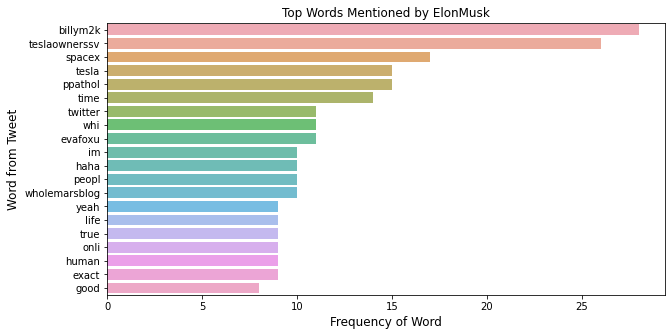

In [16]:
df = df[:20,]
plt.figure(figsize = (10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title(f"Top Words Mentioned by {user}")
plt.ylabel("Word from Tweet", fontsize=12)
plt.xlabel("Frequency of Word", fontsize=12)
plt.show()



Here we can see that Elon has enjoyed retweeting or replying to tweets by biillym2k, TeslaOwnersSV, Spacex, Tesla, ppathol

#Setting up Donut Chart of Top 5 words

In [17]:
df2 = df[:5,]
df2

billym2k         28
teslaownerssv    26
spacex           17
tesla            15
ppathol          15
Name: 0, dtype: int64

In [18]:
words = df2.index.tolist()
frequency = df2.values.tolist()
print(words)
print(frequency)

['billym2k', 'teslaownerssv', 'spacex', 'tesla', 'ppathol']
[28, 26, 17, 15, 15]


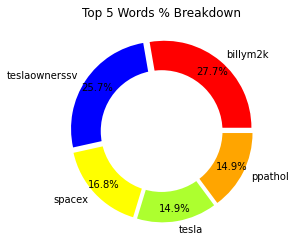

In [19]:
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(frequency, colors=colors, labels=words, autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Top 5 Words % Breakdown')

plt.show()


Now we can easily see the frequency of the words as a percentage